In [ ]:
#            _____  _____ _____ _____ _______ ______ _____   _____  ____   _____ _____ ______ _________     __
#      /\   |  __ \|  __ \_   _/ ____|__   __|  ____|  __ \ / ____|/ __ \ / ____|_   _|  ____|__   __\ \   / /
#     /  \  | |  | | |  | || || |       | |  | |__  | |  | | (___ | |  | | |      | | | |__     | |   \ \_/ / 
#    / /\ \ | |  | | |  | || || |       | |  |  __| | |  | |\___ \| |  | | |      | | |  __|    | |    \   /  
#   / ____ \| |__| | |__| || || |____   | |  | |____| |__| |____) | |__| | |____ _| |_| |____   | |     | |   
#  /_/    \_\_____/|_____/_____\_____|  |_|  |______|_____/|_____/ \____/ \_____|_____|______|  |_|     |_|  

---

# **Einführung in die Gesichtserkennung mit OpenCV**

In dieser Lerneinheit wirst du lernen, wie man mit OpenCV eine einfache Gesichtserkennung implementiert. OpenCV ist eine mächtige Bibliothek für Computer Vision, die eine Vielzahl von vortrainierten Modellen und Funktionen bietet, um Aufgaben wie Gesichtserkennung, Objekterkennung und vieles mehr zu bewältigen.

OpenCV steht für "Open Source Computer Vision". Es handelt sich um eine weit verbreitete Open-Source-Bibliothek, die sowohl für akademische als auch industrielle Anwendungen genutzt wird, um Bild- und Videoverarbeitungsprojekte zu realisieren.

Wenn du an weiteren spannenden Themen rund um Computer Vision, KI und Programmierung interessiert bist, abonniere gerne meinen YouTube-Kanal [@addicted_society](https://www.youtube.com/@addicted_society), um keine neuen Videos zu verpassen!

--- 


## Installation von OpenCV und weiteren relevanten Bibliotheken

Um mit der Gesichtserkennung und Objekterkennung loszulegen, müssen wir OpenCV und einige andere relevante Bibliotheken installieren.

### 1. Installation von OpenCV

In [6]:
! pip install opencv-python

### 2. Installation weiterer Bibliotheken

Neben OpenCV benötigen wir zusätzliche Bibliotheken, um fortschrittliche Modelle wie YOLO verwenden zu können:

In [ ]:
! pip install mediapipe

### Unterschiede zwischen YOLO, MediaPipe und OpenCV

- **OpenCV**:
  - **Art**: Bibliothek für Bildverarbeitung und Computer Vision.
  - **Anwendung**: Bildbearbeitung, Filter, Bewegungserkennung, Unterstützung von ML-Modellen (z.B. YOLO).
  - **Vorteile**: Vielseitigkeit, große Funktionalität.
  - **Nachteile**: Weniger spezialisiert auf neuronale Netze, langsamer bei komplexen Aufgaben.

- **YOLO (You Only Look Once)**:
  - **Art**: Objekterkennungs-Algorithmus (neuronales Netz).
  - **Anwendung**: Echtzeit-Objekterkennung (z.B. Personen, Fahrzeuge).
  - **Vorteile**: Schnell, erkennt mehrere Objekte gleichzeitig.
  - **Nachteile**: Kann bei kleinen Objekten ungenauer sein.

- **MediaPipe**:
  - **Art**: Framework für ML-basierte Echtzeit-Tracking-Pipelines.
  - **Anwendung**: Handverfolgung, Gesichtserkennung, Pose-Tracking.
  - **Vorteile**: Einfach zu implementieren, effizient, vortrainierte Modelle.
  - **Nachteile**: Eingeschränkte Anpassbarkeit für benutzerdefinierte Aufgaben.




---

---
# **1. Basics von OpenCV**
---


### Lesen eines Bildes

In [1]:
import cv2

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg') # hier den Pfad zum Bild eintragen

# Bild anzeigen
cv2.imshow('Gelesenes Bild', image)
cv2.waitKey(0) # 0 bedeutet, dass das Bild so lange angezeigt wird, bis eine Taste gedrückt wird
cv2.destroyAllWindows()

### Größenänderung eines Bildes

In [2]:
import cv2

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Bildgröße ändern
resized_image = cv2.resize(image, (300, 300)) # x, y Skalierung

# Bild anzeigen
cv2.imshow('Größenänderung', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation eines Bildes

In [3]:
import cv2

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Dimensionen des Bildes erhalten
rows, cols = image.shape[:2] # Höhe, Breite

# Rotationsmatrix erstellen
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.5) # Referenzpunkt, Winkel, Skalierung

# Bild rotieren
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
rotated_image = cv2.resize(rotated_image, (300, 300))   
# Bild anzeigen
cv2.imshow('Rotation', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine Transformation

Affine Transformationen sind geometrische Operationen, die verwendet werden, um ein Bild zu verschieben, zu drehen, zu skalieren oder zu verzerren, während **gerade Linien und parallele Linien erhalten bleiben**. Es wird oft in der Bildverarbeitung und Computergrafik genutzt, z.B. zur geometrischen Anpassung.

### Anwendungsfälle:
- **Bildausrichtung:** Anpassung eines Bildes, um Objekte in eine bestimmte Position zu bringen.
- **Augmentierung:** Variationen eines Bildes erstellen (z.B. für Machine Learning).
- **Bildkorrekturen:** Schiefe Bilder begradigen oder perspektivische Verzerrungen beheben.
- **Geometrische Transformationen:** Verschieben, Drehen, Skalieren oder Scheren von Bildern ohne Verformung der Strukturen.

Affine Transformationen sind besonders nützlich, weil sie flexibel sind und grundlegende Veränderungen im Bild vornehmen können, ohne die Gesamtstruktur (z.B. Geraden und Verhältnisse) zu zerstören.


In [4]:
import cv2  # OpenCV-Bibliothek importieren, um Bildverarbeitung durchzuführen
import numpy as np  # NumPy-Bibliothek importieren, um mit Matrizen und Arrays zu arbeiten

# Bild einlesen von der angegebenen Dateipfad
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Definieren von drei Punkten auf dem Originalbild, die für die Transformation verwendet werden (Quellpunkte)
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Definieren der drei Zielpunkte, wohin die Quellpunkte transformiert werden sollen (Zielpunkte)
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Berechnung der Affinen Transformationsmatrix basierend auf den Quell- und Zielpunkten
affine_matrix = cv2.getAffineTransform(pts1, pts2)

# Anwenden der affinen Transformation auf das Bild
# Dabei wird das Bild um die neue Matrix verzerrt, verschoben oder gedreht
transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0])) # Bild , Matrix, Größe

# Das transformierte Bild auf eine Größe von 300x300 Pixeln skalieren
transformed_image = cv2.resize(transformed_image, (300, 300))

# Das transformierte Bild in einem Fenster anzeigen
cv2.imshow('Affine Transformation', transformed_image)

# Auf eine beliebige Taste warten, um das Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


### Zeichnen von Formen

In [5]:
import cv2

# Leeres Bild erstellen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Linie zeichnen
cv2.line(image, (0, 0), (250, 250), (255, 0, 0), 5) # Startpunkt, Endpunkt, Farbe(BGR), Dicke

# Rechteck zeichnen
cv2.rectangle(image, (10, 10), (200, 200), (0, 255, 0), -1) # Startpunkt, Endpunkt, Farbe(BGR), Dicke

# Kreis zeichnen
cv2.circle(image, (150, 150), 50, (0, 0, 255), -1) # Mittelpunkt, Radius, Farbe, Füllung (-1) = gefüllt



image = cv2.resize(image, (500, 500))

# Bild anzeigen
cv2.imshow('Formen', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Text hinzufügen

In [6]:
import cv2

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Text hinzufügen
cv2.putText(image, 'Hello OpenCV!', (50, 500), cv2.FONT_HERSHEY_SIMPLEX, 10, (255, 255, 255), 50) # Text, Position, Schriftart, Skalierung, Farbe, Dicke
image = cv2.resize(image, (500, 500))
# Bild anzeigen
cv2.imshow('Text', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Essentielle Funktionen in OpenCV**

1. Farbumwandlung

In [7]:
import cv2

# Bild von der angegebenen Datei lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Umwandlung des Farb-Bildes in ein Graustufen-Bild
# cvtColor konvertiert das Bild von BGR (Blau, Grün, Rot) in Grau
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Das Graustufen-Bild auf 500x500 Pixel skalieren
gray_image = cv2.resize(gray_image, (500, 500))

# Das Graustufen-Bild in einem Fenster anzeigen
cv2.imshow('Graustufen', gray_image)

# Auf eine beliebige Taste warten, um das Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()

2. Bildglättung (Gaussian Blur)

In [8]:
import cv2

# Gaussian Blur (Weichzeichnung) auf das Bild anwenden
# (5, 5) ist die Kernelgröße, und 5 ist die Standardabweichung für den Filter
blurred_image = cv2.GaussianBlur(image, (7, 7), 5)

# Das weichgezeichnete Bild auf 500x500 Pixel skalieren
blurred_image = cv2.resize(blurred_image, (500, 500))

# Das Originalbild ebenfalls auf 500x500 Pixel skalieren, um beide Bilder gleich groß anzuzeigen
original_resized = cv2.resize(image, (500, 500))

# Das weichgezeichnete Bild in einem Fenster anzeigen
cv2.imshow('Gaussian Blur', blurred_image)

# Das Originalbild in einem separaten Fenster anzeigen
cv2.imshow('Original', original_resized)

# Auf eine beliebige Taste warten, um beide Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


3. Kanten erkennen (Canny Edge Detection)

In [9]:
import cv2

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Canny Edge Detection anwenden
# 100 und 200 sind die unteren und oberen Schwellenwerte für die Kantenerkennung
edges = cv2.Canny(image, 100, 150)

# Das Kantenbild auf 500x500 Pixel skalieren
edges = cv2.resize(edges, (500, 500))

# Das Kantenbild in einem Fenster anzeigen
cv2.imshow('Kanten', edges)

# Auf eine beliebige Taste warten, um das Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()

4. Bild zuschneiden (Cropping)

In [10]:
import cv2

# Bild von der angegebenen Datei lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Bild zuschneiden: Das Bild wird von Zeile 50 bis 200 und Spalte 100 bis 300 ausgeschnitten
# Die Syntax ist image[Höhe (y):Höhe (y), Breite (x):Breite (x)]
cropped_image = image[50:200, 100:300]

# Das zugeschnittene Bild in einem Fenster anzeigen
cv2.imshow('Zuschneiden', cropped_image)

# Auf eine beliebige Taste warten, um das Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


5. Bild Graustufen und Binarisierung

In [11]:
import cv2

# Bild von der angegebenen Datei lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')

# Umwandlung des Farb-Bildes in ein Graustufen-Bild
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Bild binarisieren: Alle Pixelwerte unter 127 werden auf 0 (Schwarz) gesetzt,
# alle Pixelwerte über 127 werden auf 255 (Weiß) gesetzt
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# _, hierbei handelt es sich um den Rückgabewert von threshold, den wir nicht benötigen

original_resized = cv2.resize(image, (500, 500))

# Das binarisierte Bild auf 500x500 Pixel skalieren
binary_image = cv2.resize(binary_image, (500, 500))

# Das binarisierte Bild in einem Fenster anzeigen
cv2.imshow('Binarisieren', binary_image)
cv2.imshow('Original', original_resized)

# Auf eine beliebige Taste warten, um das Fenster zu schließen
cv2.waitKey(0)

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()

### Warum diese 5 Funktionen in OpenCV essenziell sind

1. **Farbumwandlung (Color Conversion)**:
   - **Vereinfachung der Analyse**: Reduziert die Bildkomplexität, indem Farbbilder in Graustufenbilder umgewandelt werden, was für viele Bildverarbeitungsalgorithmen unerlässlich ist.

2. **Bildglättung (Gaussian Blur)**:
   - **Rauschreduzierung**: Entfernt Bildrauschen und glättet Details, was die Genauigkeit nachfolgender Verarbeitungsschritte wie Kantenerkennung verbessert.

3. **Kanten erkennen (Canny Edge Detection)**:
   - **Struktur- und Konturenerkennung**: Ermöglicht die Identifikation von signifikanten Bildstrukturen und Konturen, die für die Objekterkennung und Segmentierung notwendig sind.

4. **Bild zuschneiden (Cropping)**:
   - **Fokussierung auf relevante Bereiche**: Erlaubt es, sich auf wichtige Teile des Bildes zu konzentrieren, was die Effizienz und Präzision der Analyse steigert.

5. **Bild binarisieren (Thresholding)**:
   - **Hervorhebung von Merkmalen**: Wandelt Graustufenbilder in binäre Bilder um, wodurch wichtige Merkmale wie Kanten besser hervorgehoben werden und die Verarbeitung vereinfacht wird.


### Lesen eines Videos oder Webcam


In [12]:
import cv2

# Video öffnen (entweder von einer Datei oder eine Webcam, z. B. 0 für die Standard-Webcam)
video = cv2.VideoCapture(r'Dateien\Grafiken\video.mp4')  # Den Pfad zum Video angeben oder 0 für Webcam verwenden

# Schleife, solange das Video geöffnet ist
while video.isOpened():
    # Frame aus dem Video lesen
    ret, frame = video.read()  # ret ist True, wenn das Frame erfolgreich gelesen wurde, frame enthält das gelesene Bild
    if not ret:  # Wenn kein Frame mehr gelesen werden kann (Ende des Videos)
        break
    
    # Frame skalieren: Hier wird die Größe um den Faktor 0.25 reduziert (25% der ursprünglichen Größe)
    resize_p = 0.25
    frame = cv2.resize(frame, (int(frame.shape[1]*resize_p), int(frame.shape[0]*resize_p)))  # Breite und Höhe des Frames entsprechend anpassen
    
    # Das aktuelle Frame in einem Fenster anzeigen
    cv2.imshow('Video Frame', frame)
    
    # Wenn die Taste 'q' gedrückt wird, die Schleife beenden und das Video stoppen
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben des VideoCapture-Objekts
video.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()

In [14]:
import cv2  # OpenCV-Bibliothek importieren

# Videoquelle öffnen (0 für die Standard-Webcam)
video = cv2.VideoCapture(0)  # 0 bedeutet, dass die Webcam verwendet wird

# Schleife, solange das Video geöffnet ist
while video.isOpened():
    # Frame von der Webcam lesen
    ret, frame = video.read()  # ret ist True, wenn ein Frame erfolgreich gelesen wurde, frame enthält das aktuelle Bild
    if not ret:  # Falls kein Frame gelesen werden konnte (z. B. bei einem Fehler oder Ende des Videos)
        break

    # Frame skalieren: Hier wird die Größe des Frames verdoppelt (Skalierungsfaktor 2)
    resize_p = 2
    frame = cv2.resize(frame, (int(frame.shape[1]*resize_p), int(frame.shape[0]*resize_p)))  # Breite und Höhe des Frames anpassen
    
    # Das aktuelle Frame in einem Fenster anzeigen
    cv2.imshow('Camera Frame', frame)  # Den Live-Feed der Webcam anzeigen
    
    # Wenn die Taste 'q' gedrückt wird, beende die Schleife und stoppe die Videoanzeige
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Videoquelle (Webcam)
video.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()



---

---
# **2. Erweiterte Konzepte**
---


1. Farbräume

In [15]:
import cv2  # OpenCV-Bibliothek importieren

# Webcam starten (0 bedeutet Standard-Webcam)
cap = cv2.VideoCapture(0)

# Schleife, die Frames von der Webcam kontinuierlich liest
while True:
    ret, frame = cap.read()  # ret gibt an, ob das Frame erfolgreich gelesen wurde, frame enthält das aktuelle Bild
    if not ret:  # Wenn kein Frame gelesen werden kann, beende die Schleife
        break

    # Umwandlung des Frames in verschiedene Farbräume
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Konvertierung in Graustufen
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)    # Konvertierung in den HSV-Farbraum (Hue, Saturation, Value)
    lab_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)    # Konvertierung in den LAB-Farbraum

    # Anzeige der Original- und konvertierten Frames in separaten Fenstern
    cv2.imshow('Original Frame', frame)      # Originalbild anzeigen
    cv2.imshow('Gray Frame', gray_frame)     # Graustufenbild anzeigen
    cv2.imshow('HSV Frame', hsv_frame)       # HSV-Bild anzeigen
    cv2.imshow('LAB Frame', lab_frame)       # LAB-Bild anzeigen
    
    # Beenden, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Webcam-Ressourcen
cap.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


2. Farbkanäle

In [16]:
import cv2  # OpenCV-Bibliothek importieren

# Webcam starten (0 bedeutet Standard-Webcam)
cap = cv2.VideoCapture(0)

# Schleife, die Frames von der Webcam kontinuierlich liest
while True:
    ret, frame = cap.read()  # ret gibt an, ob das Frame erfolgreich gelesen wurde, frame enthält das aktuelle Bild
    if not ret:  # Wenn kein Frame gelesen werden kann, beende die Schleife
        break

    # Aufteilen des Frames in die drei Farbkanäle B (Blau), G (Grün), R (Rot)
    B, G, R = cv2.split(frame)


    # Erstellen von Bildern, die jeweils nur einen der Farbkanäle anzeigen
    blue_frame = cv2.merge([B, B*0, B*0])   # Bild, das nur den blauen Kanal enthält
    green_frame = cv2.merge([G*0, G, G*0])  # Bild, das nur den grünen Kanal enthält
    red_frame = cv2.merge([R*0, R*0, R])    # Bild, das nur den roten Kanal enthält

    # Anzeige der einzelnen Farbkanäle in separaten Fenstern
    cv2.imshow('Blue Channel', blue_frame)   # Nur Blau anzeigen
    cv2.imshow('Green Channel', green_frame) # Nur Grün anzeigen
    cv2.imshow('Red Channel', red_frame)     # Nur Rot anzeigen
    
    # Beenden, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Webcam-Ressourcen
cap.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


3. Weichzeichnen (Blurring)

In [33]:
import cv2  # OpenCV-Bibliothek importieren

# Webcam starten (0 bedeutet Standard-Webcam)
cap = cv2.VideoCapture(0)

# Schleife, die Frames von der Webcam kontinuierlich liest
while True:
    ret, frame = cap.read()  # ret gibt an, ob das Frame erfolgreich gelesen wurde, frame enthält das aktuelle Bild
    if not ret:  # Wenn kein Frame gelesen werden kann, beende die Schleife
        break

    # Verschiedene Weichzeichnungs-Methoden
    blurred = cv2.blur(frame, (5, 5))  # Durchschnittsfilter mit einem 5x5 Kernel (Box-Filter)
    gaussian_blurred = cv2.GaussianBlur(frame, (5, 5), 0)  # Gauss'scher Weichzeichner mit einem 5x5 Kernel, 0 bedeutet, dass die Standardabweichung automatisch berechnet wird
    median_blurred = cv2.medianBlur(frame, 5)  # Medianfilter mit einem Kernel von 5x5

    # Anzeigen der Frames mit den jeweiligen Weichzeichnungs-Methoden
    cv2.imshow('Blurred Frame', blurred)  # Frame mit Durchschnittsfilter
    cv2.imshow('Gaussian Blurred Frame', gaussian_blurred)  # Frame mit Gauss'schem Weichzeichner
    cv2.imshow('Median Blurred Frame', median_blurred)  # Frame mit Medianfilter
    
    # Beenden, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Webcam-Ressourcen
cap.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()


4. Bitweise Operationen Maskieren


In [ ]:
# shape[0]: Höhe des Bildes (Anzahl der Zeilen).
# shape[1]: Breite des Bildes (Anzahl der Spalten).
# shape[2]: Anzahl der Farbkanäle (meist 3 für BGR).
# frame.shape[:2] bedeutet, dass nur die ersten zwei Werte, also Höhe und Breite, verwendet werden, um ein zweidimensionales Array zu erstellen.

In [17]:
import cv2
import numpy as np


# Webcam starten
cap = cv2.VideoCapture(0)

while True:
    # Webcam-Bild (Frame) einlesen
    ret, frame = cap.read()
    if not ret:
        break

    # Maske erstellen: Ein schwarzes Bild (gleiche Größe wie das Frame)
    mask = np.zeros(frame.shape[:2], dtype="uint8")  # 'zeros' erstellt ein Bild nur mit Schwarz (0), dtype bestimmt den Datentyp (uint8 für 8-Bit Werte)
    
    # Rechteck in die Maske zeichnen: Ein weißes Rechteck von (50, 50) bis (250, 250)
    cv2.rectangle(mask, (50, 50), (250, 250), 255, -1)  # '-1' füllt das Rechteck mit der Farbe 255 (Weiß)
    
    # Kreis in die Maske zeichnen: Ein weißer Kreis in der Mitte des Bildes mit Radius 150
    cv2.circle(mask, (frame.shape[1]//2, frame.shape[0]//2), 150, 255, -1)  # Mittelpunkt ist der Bildmittelpunkt

    # Bitweise Operationen:
    # AND: Nur die Pixel behalten, die in beiden Bildern (Frame und Maske) weiß sind
    bitwise_and = cv2.bitwise_and(frame, frame, mask=mask) 
    
    # OR: Pixel behalten, die in einem der beiden Bilder (Frame oder Maske) weiß sind
    bitwise_or = cv2.bitwise_or(frame, frame, mask=mask)
    
    # XOR: Nur die Pixel behalten, die entweder im Frame oder der Maske weiß sind, aber nicht in beiden
    bitwise_xor = cv2.bitwise_xor(frame, frame, mask=mask)
    
    # NOT: Negation der Maske (Schwarz wird zu Weiß, Weiß zu Schwarz)
    bitwise_not = cv2.bitwise_not(mask)

    # Ergebnisse der Operationen anzeigen
    cv2.imshow('AND', bitwise_and)
    cv2.imshow('OR', bitwise_or)
    cv2.imshow('XOR', bitwise_xor)
    cv2.imshow('NOT', bitwise_not)
    
    # Beenden, wenn 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigabe der Webcam-Ressourcen und Schließen der Fenster
cap.release()
cv2.destroyAllWindows()


6. Histogrammberechnung

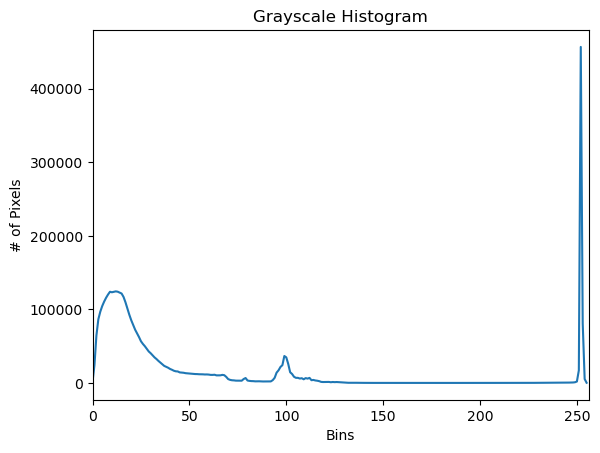

In [43]:
import cv2
import matplotlib.pyplot as plt

# Bild lesen
image = cv2.imread(r'Dateien\Grafiken\image.jpg')  # Pfad zum Bild eintragen
# Mit 'cv2.imread()' wird das Bild von der Festplatte gelesen und in eine Matrix (NumPy-Array) umgewandelt,
# die die Pixelwerte des Bildes enthält. In diesem Fall wird ein Bild im BGR-Format geladen.

# Umwandlung in Graustufen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Das geladene Farbbild wird mit 'cv2.cvtColor()' in ein Graustufenbild umgewandelt. Dies reduziert die 
# Farbkanäle von 3 (BGR) auf 1 (Graustufen), da das Histogramm für ein Graustufenbild erstellt wird.

# Histogramm berechnen
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
# 'cv2.calcHist()' berechnet das Histogramm des Graustufenbildes. Die Parameter sind:
# - [gray_image]: Die Eingabe, das Graustufenbild.
# - [0]: Der Index des Kanals, für den das Histogramm berechnet wird (Graustufen hat nur 1 Kanal).
# - None: Keine Maske, das Histogramm wird über das gesamte Bild berechnet.
# - [256]: Anzahl der Bins (Intervalle für die Helligkeitswerte, von 0 bis 255).
# - [0, 256]: Der Bereich der Helligkeitswerte, von 0 (schwarz) bis 255 (weiß).

# Histogramm anzeigen
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")  # Die x-Achse repräsentiert die Helligkeitswerte (0 bis 255).
plt.ylabel("# of Pixels")  # Die y-Achse repräsentiert die Anzahl der Pixel in jedem Helligkeitsbereich.
plt.plot(histogram)  # Das Histogramm wird geplottet, mit Helligkeitswerten auf der x-Achse und Pixelanzahl auf der y-Achse.
plt.xlim([0, 256])  # Setzt die Grenzen der x-Achse, um sicherzustellen, dass das gesamte Spektrum (0 bis 255) dargestellt wird.
plt.show()  # Zeigt das Histogramm im Matplotlib-Fenster an.

# Bildfenster schließen
cv2.destroyAllWindows()

8. Kantenerkennung

In [18]:
import cv2  # OpenCV-Bibliothek importieren

# Webcam starten (0 bedeutet Standard-Webcam)
cap = cv2.VideoCapture(0)

# Schleife, die Frames von der Webcam kontinuierlich liest
while True:
    ret, frame = cap.read()  # ret gibt an, ob das Frame erfolgreich gelesen wurde, frame enthält das aktuelle Bild
    if not ret:  # Wenn kein Frame gelesen werden kann, beende die Schleife
        break

    # Frame in Graustufen umwandeln
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Canny-Kantenerkennung anwenden (Schwellenwerte: 100 und 200)
    edges = cv2.Canny(gray_frame, 100, 200)

    # Anzeige des Frames mit erkannten Kanten
    cv2.imshow('Edges', edges)
    
    # Beenden, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Webcam-Ressourcen
cap.release()

# Alle geöffneten OpenCV-Fenster schließen
cv2.destroyAllWindows()



---

---
# **3. Gesichtserkennung**
---


Dieser Code zeigt, wie man mit OpenCV und vortrainierten Haar-Cascade-Modellen in Echtzeit Gesichter von einer Webcam erkennt. Mithilfe des Haar-Cascade-Ansatzes, einem schnellen und effizienten Algorithmus für die Gesichtserkennung, werden die erkannten Gesichter im Videostream hervorgehoben.

Der Haar-Cascade-Algorithmus funktioniert, indem er Merkmale wie Kanten und Texturen in mehreren Stufen überprüft. Dadurch erkennt er Gesichter effizient, indem er Regionen im Bild scannt, die diesen Merkmalen entsprechen. Er nutzt vortrainierte Modelle, um Gesichter in Echtzeit aus dem Videostream der Webcam zu detektieren.

### **Einfache Gesichtserkennung**

In [1]:
import cv2

# Haar-Cascade ist ein vortrainierter Klassifikator, der anhand von Merkmalen Gesichter erkennt.
# Dieses Modell wurde mit positiven (Gesichter) und negativen (Nicht-Gesichter) Beispielen trainiert, um Gesichtsstrukturen zu erkennen.

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Laden des Modells, die XML-Datei enthält die Merkmale die für Gesichtstruktur verwendet werden

# Starte den Zugriff auf die Webcam
cap = cv2.VideoCapture(0)

while True:
    # Lese den aktuellen Frame von der Webcam
    ret, frame = cap.read()

    # Umwandlung in Graustufen (die Haar-Cascade funktioniert besser mit Graustufenbildern)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Gesichtserkennung durchführen
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # 'detectMultiScale' ist die Methode zur Gesichtserkennung:
    # - scaleFactor: Bestimmt, wie stark das Bild bei jedem Schritt skaliert wird. Ein kleinerer Wert bedeutet genauere Erkennung.
    # - minNeighbors: Bestimmt, wie viele Nachbarn jedes Rechteck haben muss, um als Gesicht erkannt zu werden. Höhere Werte ergeben weniger, aber präzisere Gesichtsrechtecke.
    # - minSize: Minimale Größe eines erkannten Gesichts, um Fehlmeldungen bei sehr kleinen Objekten zu vermeiden.

    # Über alle erkannten Gesichter iterieren und ein Rechteck um jedes Gesicht zeichnen
    for (x, y, w, h) in faces: # x, y sind die Koordinaten der oberen linken Ecke, w, h sind Breite und Höhe des Rechtecks
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Zeichnet ein Rechteck um jedes erkannte Gesicht, hier in Blau (RGB: 255, 0, 0) und 2 Pixel dick.

    # Ergebnis anzeigen
    cv2.imshow('Gesichtserkennung', frame)

    # Wenn die 'q'-Taste gedrückt wird, beende die Schleife
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigabe der Webcam und Schließen aller Fenster
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


 ### **Anzeigen der Anzahl erkannter Gesichter**

In [20]:
import cv2

# Lade das vortrainierte Modell für Gesichtserkennung (Haar-Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Starte den Zugriff auf die Webcam
cap = cv2.VideoCapture(0)

while True:
    # Lese den aktuellen Frame von der Webcam
    ret, frame = cap.read()

    # Umwandlung in Graustufen
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Gesichtserkennung durchführen
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    

    # Über alle erkannten Gesichter iterieren und ein Rechteck um jedes Gesicht zeichnen
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Anzahl der erkannten Gesichter auf dem Frame anzeigen
    cv2.putText(frame, f'Gesichter erkannt: {len(faces)}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Ergebnis anzeigen
    cv2.imshow('Gesichtserkennung', frame)

    # Wenn die 'q'-Taste gedrückt wird, beende die Schleife
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigabe der Webcam und Schließen aller Fenster
cap.release()
cv2.destroyAllWindows()


### **Gesichtserkennung mit zusätzlicher Augen- und Munderkennung**

In [21]:
import cv2

# Lade die vortrainierten Haar-Cascade-Modelle für Gesicht, Augen und Mund
# Diese XML-Dateien enthalten die trainierten Modelle für die Erkennung von Gesichtern, Augen und Lächeln
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Starte den Zugriff auf die Webcam (0 steht für die Standard-Webcam)
cap = cv2.VideoCapture(0)

while True:
    # Lese den aktuellen Frame von der Webcam
    ret, frame = cap.read()
    
    # Wenn das Frame nicht erfolgreich gelesen wird (ret == False), beende die Schleife
    if not ret:
        break

    # Umwandlung in Graustufen, da die Haar-Cascade-Klassifikatoren effizienter mit Graustufenbildern arbeiten
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Gesichtserkennung: sucht Gesichter im Graustufenbild
    # scaleFactor: Wie stark das Bild bei jedem Schritt skaliert wird, um Gesichter unterschiedlicher Größe zu erkennen
    # minNeighbors: Wie viele Nachbarn um ein erkanntes Rechteck liegen müssen, damit es als Gesicht gilt
    # minSize: Minimale Größe des Gesichts, um Fehlmeldungen zu vermeiden
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iteriere über alle erkannten Gesichter
    for (x, y, w, h) in faces:
        # Zeichne ein Rechteck um jedes erkannte Gesicht (im Originalbild in Blau)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Definiere den Gesichtsauschnitt (Region of Interest, ROI) für Augen- und Munderkennung
        # Der ROI ist der Bereich im Bild, der das erkannte Gesicht darstellt
        roi_gray = gray_frame[y:y+h, x:x+w]  # Graustufenbild des Gesichts
        roi_color = frame[y:y+h, x:x+w]  # Farbversion des Gesichts für die Anzeige

        # Augen im erkannten Gesicht erkennen
        # Es wird nur innerhalb des Gesichts (ROI) nach Augen gesucht
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            # Zeichne ein grünes Rechteck um die erkannten Augen
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        # Mund (Lächeln) im erkannten Gesicht erkennen
        # scaleFactor und minNeighbors werden für den Mund (Lächeln) angepasst, um genaue Ergebnisse zu erzielen
        smile = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22, minSize=(25, 25))
        for (sx, sy, sw, sh) in smile:
            # Zeichne ein gelbes Rechteck um das erkannte Lächeln
            # Beachte, dass das Rechteck nur die untere Hälfte des Mundes abdeckt
            cv2.rectangle(roi_color, (sx, sy+int(sh/2)), (sx+sw, sy+sh), (0, 255, 255), 2)

    # Ergebnis anzeigen: Das Originalbild mit gezeichneten Rechtecken um Gesichter, Augen und Lächeln
    cv2.imshow('Gesicht, Augen und Lächeln', frame)

    # Überprüfe, ob die 'q'-Taste gedrückt wird, um die Schleife zu beenden
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigabe der Webcam-Ressourcen und Schließen aller OpenCV-Fenster
cap.release()
cv2.destroyAllWindows()


### **Alters- und Geschlechtsschätzung mit OpenCV und DNN(Deep Neural Network)**
Dieser Code demonstriert die Verwendung von OpenCV zur Gesichtserkennung in Echtzeit sowie die Integration von vortrainierten neuronalen Netzen, um Alter und Geschlecht basierend auf den erkannten Gesichtern zu schätzen. Das Caffe-Framework wird verwendet, um die Netzwerke für die Alters- und Geschlechtsschätzung zu laden. Dabei werden die Netzarchitekturen in .prototxt-Dateien definiert, und die gelernten Gewichte werden aus den .caffemodel-Dateien geladen. Im Videostream der Webcam werden die erkannten Gesichter hervorgehoben und die geschätzten Alters- und Geschlechtskategorien über jedem Gesicht angezeigt.

In [22]:
import cv2
import numpy as np

# Lade vortrainierte Modelle für Gesichtserkennung, Alters- und Geschlechtsschätzung

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
age_net = cv2.dnn.readNetFromCaffe(r'Dateien\Module\Yolo\deploy_age.prototxt', r'Dateien\Module\Yolo\age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe(r'Dateien\Module\Yolo\deploy_gender.prototxt', r'Dateien\Module\Yolo\gender_net.caffemodel')

#.prototxt: Definiert die Architektur eines neuronalen Netzwerks (Schichten, Parameter) im Caffe-Framework.
#.caffemodel: Enthält die trainierten Gewichte des Netzwerks, die während des Trainings gelernt wurden.

# Alterskategorien
age_list = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
# Geschlechtskategorien
gender_list = ['Male', 'Female']

# Starte den Zugriff auf die Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Umwandlung in Graustufen
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Gesichtserkennung
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Gesicht extrahieren und für DNN vorbereiten
        face_img = frame[y:y+h, x:x+w]
        blob = cv2.dnn.blobFromImage(face_img, 1.0, (227, 227), (104.0, 177.0, 123.0))

        # Geschlechtserkennungq
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_list[gender_preds[0].argmax()]

        # Alterserkennung
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_list[age_preds[0].argmax()]

        # Ergebnisse anzeigen
        label = f'{gender}, {age}'
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('Alters- und Geschlechtsschätzung', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


### **Handerkennung in Echtzeit mit OpenCV und Mediapipe**
Dieser Code nutzt die Mediapipe-Bibliothek, um in Echtzeit Hände und deren Landmarken (Fingerpositionen und Handgelenke) in einem Videostream von der Webcam zu erkennen. Mithilfe der Mediapipe-Handerkennung werden die erkannten Handpunkte sowie ihre Verbindungen visuell auf dem Bild dargestellt. OpenCV wird verwendet, um die Videoaufnahme zu verarbeiten und die Ergebnisse anzuzeigen.

In [23]:
import cv2
import mediapipe as mp

# Initialisiere Mediapipe Hand-Erkennung
mp_hands = mp.solutions.hands  # Mediapipe Hand-Modul laden
hands = mp_hands.Hands()  # Handerkennung initialisieren
mp_draw = mp.solutions.drawing_utils  # Zeichenwerkzeuge von Mediapipe laden

# Webcam oder Video öffnen
cap = cv2.VideoCapture(0)  # Webcam starten (0 für Standard-Webcam)

while True:
    success, img = cap.read()  # Frame von der Webcam einlesen
    if not success:  # Wenn kein Frame gelesen werden kann, beende die Schleife
        break
    
    # Bild in RGB konvertieren, da Mediapipe im RGB-Format arbeitet
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Verarbeite das Bild und erkenne Handlandmarks
    result = hands.process(img_rgb)
    
    # Wenn Handlandmarks erkannt werden
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Zeichne die Handlandmarks und deren Verbindungen auf das Bild
            mp_draw.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Zeige das Bild mit den erkannten Handlandmarks an
    cv2.imshow("Hand Detection", img)
    
    # Beenden der Schleife, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Videoressourcen und Schließen der Fenster
cap.release()
cv2.destroyAllWindows()


c:\Users\User\anaconda3\envs\AddictedSocietyEnv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


### **Echtzeit-Handerkennung mit Abstandsmessung zwischen Daumen und Zeigefinger**
Dieser Code verwendet die Mediapipe-Bibliothek, um in Echtzeit Handlandmarken zu erkennen. Er berechnet den euklidischen Abstand zwischen den Spitzen von Daumen und Zeigefinger und zeigt diesen live auf dem Bildschirm an. Zudem werden die Spitzen der Finger und die Verbindung zwischen Daumen und Zeigefinger visuell hervorgehoben.

In [24]:
import cv2  # OpenCV für Videoaufnahme und Bildverarbeitung importieren
import mediapipe as mp  # Mediapipe für Handerkennung importieren
import math  # Mathematische Funktionen für die Abstandsmessung

# Initialisiere Mediapipe Hand-Erkennung
mp_hands = mp.solutions.hands  # Modul für die Handerkennung laden
hands = mp_hands.Hands()  # Handerkennungsinstanz erstellen
mp_draw = mp.solutions.drawing_utils  # Zeichentools von Mediapipe laden

# Webcam oder Video öffnen (0 für Standard-Webcam)
cap = cv2.VideoCapture(0)

# Funktion zur Berechnung des euklidischen Abstands zwischen zwei Punkten
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Hauptschleife zur Verarbeitung jedes Frames der Webcam
while True:
    success, img = cap.read()  # Frame von der Webcam einlesen
    if not success:  # Wenn kein Frame gelesen wird, Schleife beenden
        break
    
    # Bild von BGR (OpenCV Standard) nach RGB (Mediapipe Standard) konvertieren
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(img_rgb)  # Mediapipe Handerkennung auf das Bild anwenden
    
    # Wenn Handlandmarks erkannt wurden
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Handlandmarks und Verbindungen zwischen den Punkten auf das Bild zeichnen
            mp_draw.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extrahiere die Landmarken für Daumen (Landmarke 4) und Zeigefinger (Landmarke 8)
            thumb_tip = hand_landmarks.landmark[4]
            index_tip = hand_landmarks.landmark[8]

            # Berechne die Positionen der Finger im Bild basierend auf den Bilddimensionen
            img_height, img_width, _ = img.shape  # Höhe und Breite des Bildes
            thumb_x, thumb_y = int(thumb_tip.x * img_width), int(thumb_tip.y * img_height)
            index_x, index_y = int(index_tip.x * img_width), int(index_tip.y * img_height)

            # Zeichne Kreise an den Spitzen von Daumen und Zeigefinger
            cv2.circle(img, (thumb_x, thumb_y), 10, (0, 255, 0), cv2.FILLED)
            cv2.circle(img, (index_x, index_y), 10, (0, 255, 0), cv2.FILLED)

            # Zeichne eine Linie zwischen den Spitzen von Daumen und Zeigefinger
            cv2.line(img, (thumb_x, thumb_y), (index_x, index_y), (255, 0, 0), 3)

            # Berechne den Abstand zwischen den beiden Fingern
            distance = calculate_distance(thumb_x, thumb_y, index_x, index_y)

            # Zeige den berechneten Abstand auf dem Bild an
            cv2.putText(img, f'Distance: {int(distance)}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Zeige das Bild mit den Handlandmarks und dem Abstand in einem Fenster an
    cv2.imshow("Hand Detection", img)

    # Beenden der Schleife, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Videoressourcen und Schließen der Fenster
cap.release()
cv2.destroyAllWindows()


### **Körperhaltungserkennung und -korrektur mit OpenCV und Mediapipe**
Dieser Code verwendet Mediapipe, um die Körperhaltung in Echtzeit zu analysieren. Dabei wird der Winkel zwischen Schulter, Hüfte und Knie berechnet, um eine einfache Bewertung der Haltung vorzunehmen. Wenn der berechnete Winkel auf eine schlechte Haltung hinweist, wird eine Warnung auf dem Bildschirm angezeigt. OpenCV wird verwendet, um die Webcam zu steuern und die Ergebnisse visuell darzustellen.

In [25]:
import cv2  # OpenCV für die Webcam und Bildverarbeitung
import mediapipe as mp  # Mediapipe für Pose-Erkennung
import numpy as np  # Numpy für mathematische Berechnungen

# MediaPipe Pose initialisieren
mp_pose = mp.solutions.pose  # Modul für Pose-Erkennung laden
pose = mp_pose.Pose()  # Pose-Erkennungsinstanz erstellen
mp_drawing = mp.solutions.drawing_utils  # Zeichenwerkzeuge für Pose Mesh

# Webcam öffnen
cap = cv2.VideoCapture(0)  # 0 für Standard-Webcam

def calculate_angle(a, b, c):
    """ Berechne den Winkel zwischen drei Punkten """
    a = np.array(a)  # Punkt A (Schulter)
    b = np.array(b)  # Punkt B (Hüfte)
    c = np.array(c)  # Punkt C (Knie)
    
    # Berechnung des Winkels zwischen den Punkten (Schulter, Hüfte, Knie)
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)  # Winkel in Grad umwandeln
    
    # Sicherstellen, dass der Winkel zwischen 0 und 180 Grad liegt
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Hauptschleife zur Verarbeitung jedes Frames der Webcam
while True:
    ret, frame = cap.read()  # Frame von der Webcam einlesen
    if not ret:  # Wenn kein Frame gelesen wird, Schleife beenden
        break

    # Konvertiere das Bild von BGR nach RGB (Mediapipe benötigt RGB-Format)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = pose.process(img_rgb)  # Pose-Erkennung auf das Bild anwenden

    # Wenn Pose-Landmarken erkannt wurden
    if result.pose_landmarks:
        # Zeichne das Pose Mesh (Verbindungen der Körperpunkte) auf das Bild
        mp_drawing.draw_landmarks(
            frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),  # Grün für Punkte
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Rot für Verbindungen
        )

        # Extrahiere die Positionen von Schulter, Hüfte und Knie auf der linken Seite
        landmarks = result.pose_landmarks.landmark
        shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

        # Berechne den Winkel zwischen Schulter, Hüfte und Knie (zur Analyse der Körperhaltung)
        angle = calculate_angle(shoulder_left, hip_left, knee_left)
        
        # Zeichne den berechneten Winkel auf das Bild
        cv2.putText(frame, str(int(angle)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        # Zeige eine Warnung an, wenn der Winkel auf eine schlechte Haltung hindeutet
        if angle < 160:  # Beispielschwelle für schlechte Haltung (Winkel < 160 Grad)
            cv2.putText(frame, 'Bad Posture!', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Zeige das Bild mit Pose-Mesh und Haltungsbewertung an
    cv2.imshow('Posture Correction', frame)
    
    # Beenden der Schleife, wenn die Taste 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Freigeben der Webcam und Schließen der Fenster
cap.release()
cv2.destroyAllWindows()


# Objekterkennung mit Yolo-Modell

In [26]:
import cv2
import numpy as np

# Dateienpfade zu den YOLOv3 Dateien: Konfiguration, Gewichte und Klassenbezeichnungen
config_path = r"Dateien\Module\yolov3.cfg"  # Pfad zur YOLOv3-Konfigurationsdatei
weights_path = r"Dateien\Module\yolov3.weights"  # Pfad zur YOLOv3-Gewichtedatei
names_path = r"Dateien\Module\coco.names"  # Pfad zur Datei mit den Klassenbezeichnungen (z.B. 'Person', 'Auto' etc.)

# Laden der Klassenbezeichnungen aus der coco.names Datei
with open(names_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]  # Entfernen der Leerzeichen/Zeilenumbrüche und Erstellen einer Liste der Klassennamen

# YOLO-Netzwerk laden, wobei die konfigurierten Gewichte und die Netzwerkarchitektur geladen werden
net = cv2.dnn.readNet(weights_path, config_path)

# Zugriff auf die Webcam (Index 0 ist normalerweise die Standard-Webcam des Systems)
cap = cv2.VideoCapture(0)  # Falls du ein Video nutzen willst, kannst du hier den Dateipfad angeben

# Erhalte die Namen aller Netzwerk-Schichten
layer_names = net.getLayerNames()

# Bestimme die Ausgabeschichten, die von YOLO verwendet werden (dies sind die Schichten, die tatsächlich Vorhersagen machen)
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Start der Schleife, die Frames von der Webcam aufnimmt
while True:
    ret, frame = cap.read()  # Lies einen Frame von der Webcam ein
    if not ret:  # Wenn es keine Frames gibt, wird die Schleife beendet
        break
    
    # Bestimme die Höhe, Breite und die Anzahl der Farbkanäle (z.B. RGB)
    height, width, channels = frame.shape

    # Wandelt das Bild in ein Blob-Format um, das für YOLO geeignet ist (skalierte Version des Bildes)
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)  
    # 0.00392 ist der Skalierungsfaktor, 416x416 ist die Größe, auf die das Bild skaliert wird

    # Übergebe den Blob als Input für das YOLO-Netzwerk
    net.setInput(blob)
    
    # Führe eine Vorwärtsausführung im Netzwerk durch, um die Ausgaben aus den Ausgabeschichten zu erhalten
    outs = net.forward(output_layers)

    # Initialisierung von Listen, um erkannte Objekte, Vertrauenswerte und Box-Koordinaten zu speichern
    class_ids = []  # Speichert die IDs der erkannten Klassen
    confidences = []  # Speichert die Vertrauenswerte für jedes erkannte Objekt
    boxes = []  # Speichert die Koordinaten der Begrenzungsrahmen der erkannten Objekte

    # Schleife über alle erkannten Objekte und deren Informationen
    for out in outs:
        for detection in out:
            # Die ersten 4 Werte beziehen sich auf die Position und Größe des Objekts, die restlichen Werte auf die Wahrscheinlichkeiten
            scores = detection[5:]  # Die Klassenscores beginnen ab der fünften Position
            class_id = np.argmax(scores)  # Wählt die Klasse mit dem höchsten Wahrscheinlichkeitswert aus
            confidence = scores[class_id]  # Holt den Wert der Wahrscheinlichkeit

            # Filtert nur Objekte mit einer hohen Erkennungswahrscheinlichkeit heraus (hier über 50%)
            if confidence > 0.5:
                # Bestimmt die Position und Größe des Begrenzungsrahmens im Bild
                center_x = int(detection[0] * width)  # Berechne das Zentrum des Rahmens in X-Richtung
                center_y = int(detection[1] * height)  # Berechne das Zentrum des Rahmens in Y-Richtung
                w = int(detection[2] * width)  # Breite des Rahmens
                h = int(detection[3] * height)  # Höhe des Rahmens

                # Berechne die oberen linken Koordinaten des Rahmens
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Speichere die Box-Koordinaten, Vertrauenswerte und Klassen-IDs
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Verwende Non-Maximum Suppression, um überlappende Begrenzungsrahmen basierend auf den Wahrscheinlichkeiten zu entfernen
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Zeichne die Ergebnisse auf dem Frame, wenn es erkannte Objekte gibt
    if len(indexes) > 0:
        for i in indexes.flatten():  # `flatten` wird verwendet, um die 2D-Struktur in eine einfache Liste umzuwandeln
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])  # Hol den Namen der Klasse
            confidence = confidences[i]  # Vertrauenswert des erkannten Objekts
            color = (0, 255, 0)  # Farbe der Box (grün)
            
            # Zeichne ein Rechteck um das erkannte Objekt
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            
            # Füge einen Text hinzu, der die Klasse und die Erkennungswahrscheinlichkeit zeigt
            cv2.putText(frame, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    # Zeige den Frame mit den erkannten Objekten in einem Fenster
    cv2.imshow("YOLO Object Detection", frame)

    # Beende das Programm, wenn 'q' gedrückt wird
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Schließe die Webcam und zerstöre alle Fenster
cap.release()
cv2.destroyAllWindows()
